In [1]:
library("party")
library("tidyverse")
library("arules")

Loading required package: grid

Loading required package: mvtnorm

Loading required package: modeltools

Loading required package: stats4

Loading required package: strucchange

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: sandwich

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ stringr::boundary() masks strucchange::boundary()
✖ dplyr::filter()     masks stats::filter()
✖ dplyr::lag()        masks stats::lag()

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack



Attaching package: ‘arules’


The following ob

In [21]:
df_2015_day <- readRDS('decile_2015_1.rds')
head(df_2015_day)

Warning message in gzfile(file, "rb"):
“cannot open compressed file 'decile_2015_1.rds', probable reason 'No such file or directory'”


ERROR: Error in gzfile(file, "rb"): cannot open the connection


In [3]:
df_2015_day$Unnamed..0_x <- NULL
df_2015_day$Unnamed..0 <- NULL
df_2015_day$Unnamed..0_y <- NULL

In [4]:
head(df_2015_day)

,X,datetime,squ,regression_weights,ewma_intraday_return_E4S_hl120_reg_wts_modelINVERSE_IMPACT_USE4S_ADVFIX_V0_predictor,ewma_intraday_return_E4S_hl30_reg_wts_modelINVERSE_IMPACT_USE4S_ADVFIX_V0_predictor,ewma_intraday_return_E4S_hl5_reg_wts_modelINVERSE_IMPACT_USE4S_ADVFIX_V0_predictor,ortho_E4S_reg_wts_modelINVERSE_IMPACT_USE4S_ADVFIX_V0.abnormal_volume_expanding_ema_hist20_hl120_pd30_reg_wts_modelINVERSE_IMPACT_USE4S_ADVFIX_V0_sharkless._predictor,ortho_E4S_reg_wts_modelINVERSE_IMPACT_USE4S_ADVFIX_V0.intraday_extreme_position._predictor,ortho_E4S_reg_wts_modelINVERSE_IMPACT_USE4S_ADVFIX_V0.mid_vwap_hl120._predictor,...,sqrt_regression_weights_z_reg_wts_modelINVERSE_IMPACT_USE4S_ADVFIX_V0_interactor.x.volume_curve_hist20_interactor,tod_kernel_degree1_interactor,tod_kernel_degree2_interactor,volume_curve_hist20_interactor,fwd_r_10_30_E4S_reg_wts_modelINVERSE_IMPACT_USE4S_ADVFIX_V0,fwd_r_1_10_E4S_reg_wts_modelINVERSE_IMPACT_USE4S_ADVFIX_V0,fwd_r_E4S_days1_embargo_intraday_reg_wts_modelINVERSE_IMPACT_USE4S_ADVFIX_V0,fwd_r_E4S_days1_embargo_overnight_reg_wts_modelINVERSE_IMPACT_USE4S_ADVFIX_V0,fwd_r_ToClose_E4S_from30_reg_wts_modelINVERSE_IMPACT_USE4S_ADVFIX_V0,fwd_smoothed_HL1day_window2_E4S_reg_wts_modelINVERSE_IMPACT_USE4S_ADVFIX_V0_skip1
,<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,8084,2015-01-02 09:50:00-05:00,22447,-0.3335539,-0.2636573,-0.3428675,-0.08831113,0.04996994,0.46450748,-0.4733121,...,0.02437257,-1.570926,1.793406,-0.580935710,-0.0027546734,-1.182958e-04,3.277416e-03,0.003294057,0.0014028203,0.005655869
2,8085,2015-01-02 09:50:00-05:00,22449,-0.4262189,0.7723087,1.1251365,0.59076469,-1.18103691,0.06462843,0.1885141,...,-0.34643745,-1.570926,1.793406,-0.003440338,0.0007565698,-2.634052e-03,-2.721470e-03,0.003942191,-0.0092262440,-0.007537656
3,8086,2015-01-02 09:50:00-05:00,22462,2.7431186,-0.7346843,-1.0123695,-0.07799598,0.22140650,-1.11134527,-0.2906391,...,2.96661095,-1.570926,1.793406,1.966668298,-0.0038270806,-7.591494e-04,-4.492339e-03,0.003850265,0.0010298874,-0.002284163
4,8087,2015-01-02 09:50:00-05:00,22463,3.1941333,1.1414910,1.8819570,2.21964433,0.29182472,1.16433491,0.8948737,...,3.64429934,-1.570926,1.793406,2.727978215,0.0009688875,-9.468356e-04,2.560462e-03,-0.002066192,-0.0011816641,-0.001914760
5,8088,2015-01-02 09:50:00-05:00,22470,2.1128100,-0.3154050,-0.4203320,-0.12440131,0.40016569,-0.41175712,-0.1714200,...,2.18291104,-1.570926,1.793406,1.012471548,-0.0003500649,-4.970769e-05,3.050488e-05,-0.004930913,0.0002561901,-0.002674140
6,8089,2015-01-02 09:50:00-05:00,22472,3.5055968,0.2458880,0.4338468,0.63166570,-0.32720683,1.14090554,0.2130951,...,3.28959329,-1.570926,1.793406,1.284985130,-0.0012087617,-1.810560e-03,1.703202e-03,-0.002200965,0.0043842625,0.001916202


In [5]:
# two-way inclusive
for(i in 5:38) {
  # renaming predictors with X_i
  names(df_2015_day)[i] <- paste("X_", toString(i - 4), sep = "")
}
print(names(df_2015_day)[38])

[1] "X_34"


In [6]:
names(df_2015_day)[39] <- "Z_1"
names(df_2015_day)[43] <- "Z_2"
names(df_2015_day)[47] <- "Z_3"
names(df_2015_day)[51] <- "Z_4"
names(df_2015_day)[55] <- "Z_5"
names(df_2015_day)[59] <- "Z_6"
names(df_2015_day)[63] <- "Z_7"
names(df_2015_day)[67] <- "Z_8"
names(df_2015_day)[71] <- "Z_9"
names(df_2015_day)[75] <- "Z_10"
names(df_2015_day)[79] <- "Z_11"
names(df_2015_day)[83] <- "Z_12"
names(df_2015_day)[87] <- "Z_13"
names(df_2015_day)[88] <- "Z_14"
names(df_2015_day)[89] <- "Z_15"

In [7]:
names(df_2015_day)[90] <- "Y_2"
names(df_2015_day)[91] <- "Y_1"

In [17]:
disc <- discretizeDF(df_2015_day[,39:89], default = list(method = "interval", breaks = 10,
                                       labels = 1:10))

df_1 <- df_2015_day[,1:38]

df_2 <- df_2015_day[,90:95]

df_final <- data.frame(data.frame(df_1,disc),df_2)

head(df_final$X_8)

[1] -1.33688317  0.36987044  0.03934778  1.53305805 -0.38387839  0.44739627

In [9]:
ctrl <- mob_control(alpha = 0.05, bonferroni = TRUE, minsplit = 20, verbose = TRUE)

In [14]:
results <- mob(Y_1 ~ X_8 |
            Z_3 + Z_4 + Z_5 + Z_6 + Z_7 + Z_8 + Z_10 + Z_11,
             data = df_final, control = ctrl, model = linearModel
    )


-------------------------------------------
Fluctuation tests of splitting variables:
                   Z_3        Z_4          Z_5          Z_6          Z_7
statistic 45.072096066 41.2652575 9.465642e+01 7.455244e+01 1.135427e+02
p.value    0.003236747  0.0111934 1.668972e-11 6.044441e-08 5.491558e-15
                  Z_8       Z_10         Z_11
statistic 33.91365369 30.6811667 6.151896e+01
p.value    0.09871949  0.2247968 9.279961e-06

Best splitting variable: Z_7
Perform split? yes
-------------------------------------------

Splitting factor variable, objective function: 
                1                 2               1+2                 3 
        0.1060631         0.1059419         0.1059200         0.1060372 
              1+3               2+3             1+2+3                 4 
        0.1060387         0.1059242         0.1058419         0.1060013 
              1+4               2+4             1+2+4               3+4 
        0.1060178         0.1059860         0.105

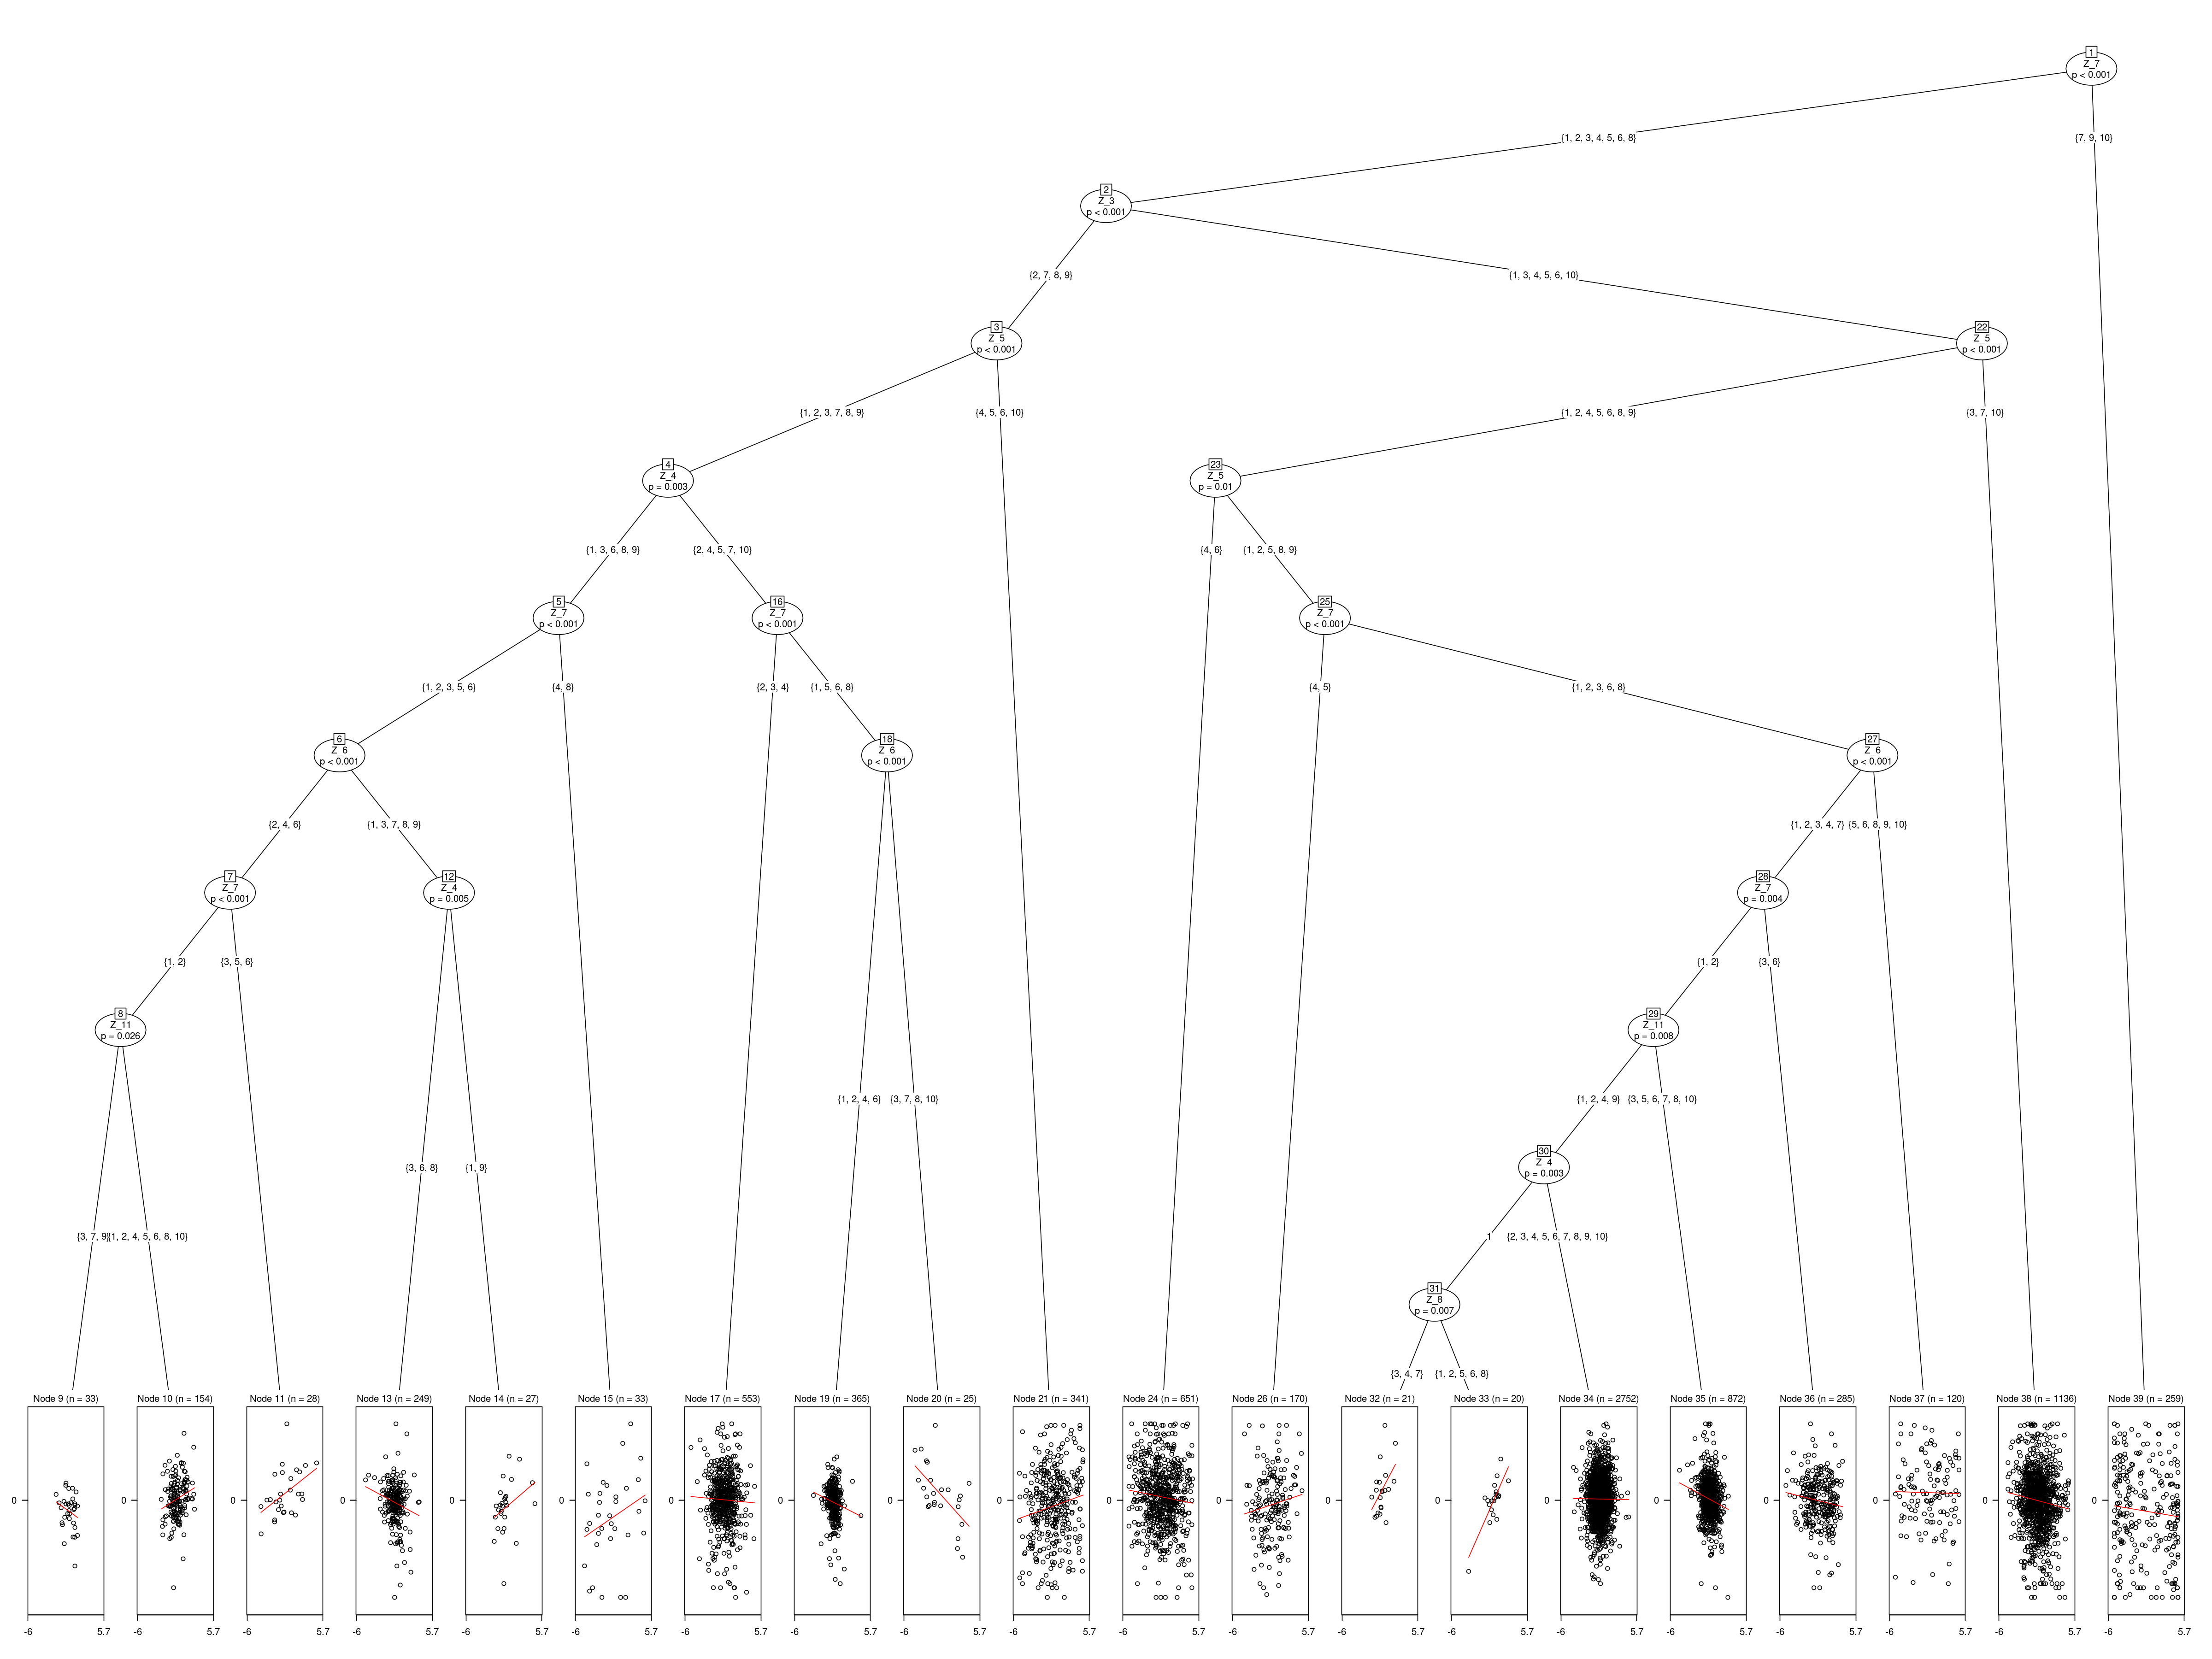

In [16]:
options(repr.plot.width=40, repr.plot.height=30)

plot(results)

In [15]:
coef(results)

,(Intercept),X_8
9,-1.356848e-03,-6.840986e-04
10,1.688595e-04,5.983526e-04
11,1.137241e-03,7.432322e-04
13,-3.495614e-04,-5.084576e-04
14,-1.118740e-03,8.084994e-04
15,-2.282822e-03,6.460699e-04
17,9.273543e-05,-9.424736e-05
19,-2.685649e-04,-4.762419e-04
20,4.921820e-04,-1.050112e-03
21,-8.487990e-04,3.432499e-04


In [18]:
summary(results)

$`9`

Call:
NULL

Weighted Residuals:
      Min        1Q    Median        3Q       Max 
-0.007299  0.000000  0.000000  0.000000  0.003758 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept) -0.0013568  0.0004978  -2.726   0.0105 *
X_8         -0.0006841  0.0005363  -1.276   0.2116  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.002614 on 31 degrees of freedom
Multiple R-squared:  0.04986,	Adjusted R-squared:  0.01922 
F-statistic: 1.627 on 1 and 31 DF,  p-value: 0.2116


$`10`

Call:
NULL

Weighted Residuals:
      Min        1Q    Median        3Q       Max 
-0.012543  0.000000  0.000000  0.000000  0.008853 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept) 0.0001689  0.0002359   0.716  0.47517   
X_8         0.0005984  0.0002246   2.665  0.00854 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.00291 on 152 degrees of freedom
Mul

In [12]:
results

1) Z_5 <= 1.006063; criterion = 1, statistic = 31.68
  2) Z_3 <= 1.439121; criterion = 1, statistic = 28.688
    3) Z_7 <= 3.294174; criterion = 0.977, statistic = 18.651
      4)*  weights = 6457 
Terminal node model
Linear model with coefficients:
(Intercept)          X_8  
  0.0001178   -0.0001456  

    3) Z_7 > 3.294174
      5)*  weights = 115 
Terminal node model
Linear model with coefficients:
(Intercept)          X_8  
  0.0011583    0.0001019  

  2) Z_3 > 1.439121
    6) Z_5 <= 0.148965; criterion = 0.993, statistic = 21.102
      7) Z_4 <= -0.2450888; criterion = 0.965, statistic = 17.658
        8)*  weights = 245 
Terminal node model
Linear model with coefficients:
(Intercept)          X_8  
  0.0007265    0.0002799  

      7) Z_4 > -0.2450888
        9)*  weights = 668 
Terminal node model
Linear model with coefficients:
(Intercept)          X_8  
 -3.336e-04    1.619e-06  

    6) Z_5 > 0.148965
      10)*  weights = 217 
Terminal node model
Linear model with coefficie

In [20]:
mean(residuals(results)^2)

[1] 1.268976e-05